<h2> #1 Cropping single streamer (all frames) <h2>

In [1]:
# For sobel streamers
## Importing the libraries 
import cv2
import fnmatch 
import os 

## Change parameters  
dir_path = ' '
root_path = ' '
streamer_nr = '1'
image_initial = 4762
image_final = 4768

reference_picture = '/Isobelx (' + str(image_final) + ').png'
#'/Isobelx (2144).png'
#'/Ibinary (' + str(image_final) + ').png'
#2144).png' 
reference_folder = '/sobelx7'

input_folder = 'sobelx7'
folder_path = os.path.join(root_path, input_folder)

# #image_final = image_initial + M
# reference_picture = '/Ibinary (2144).png'
# #'/Ibinary (' + str(image_final) + ').png'
# #2144).png' 
# reference_folder = '/2nd Crop'

# input_folder = '2nd Crop'
# folder_path = os.path.join(dir_path, input_folder)

# Path to the output folder to save cropped images
output_folder = 'Streamer ' + str(streamer_nr)
output_path = os.path.join(dir_path, output_folder)

# Create the output folder if it doesn't exist
if not os.path.exists(output_path):
    os.makedirs(output_path)


#input_folder = '/2nd Crop'
input_image = '/Isobelx ('
format_name = ').png'

#output_folder = '/streamer_' + str(streamer_nr)                   # Cropped and divided image folder name 
#newpath1 = str(dir_path) + str(streamer_folder)  
output_image = '/Istreamer_' + str(streamer_nr) +' ('                 # Name of cropped image

#%% No need to change anything 
#M = len(fnmatch.filter(os.listdir(dir_path), '*).png*'))

#ref_img = cv2.imread('E:/Belgium Work/Read Pixels/Raw/Ref.png')
Iref = cv2.imread(str(root_path) + str(reference_folder) + str(reference_picture))
Iref = cv2.rotate(Iref, cv2.ROTATE_90_CLOCKWISE)
#Iref = cv2.imread(str(dir_path) + str(reference_folder) +str(reference_picture))

cv2.namedWindow('Reference image',2)
#cv2.resizeWindow('Reference image', 1024, 544)
#cv2.resizeWindow('Reference image', 544, 1024)
    #cv2.namedWindow("Image",2)
ROI = cv2.selectROI('Reference image', Iref, False, False)
Iref_crop = Iref[int(ROI[1]):int(ROI[1]+ROI[3]), int(ROI[0]):int(ROI[0]+ROI[2])]
#Iref_crop = Iref[0:int(ROI[1]+ROI[3]), int(ROI[0]):int(ROI[0]+ROI[2])]
#cv2.imwrite('F:/Belgium Work/Read Pixels/15.05.22/sobelx_k7/2nd Crop/streamer1/Streamer01' +'/Streamer01_2.png', Iref_crop)
cv2.waitKey()
cv2.destroyAllWindows()



for k in range (int(image_initial), int(image_final)+1):
    picture = (str(root_path) + '/' + str(input_folder) + str(input_image) + str(k) + str(format_name))
    I = cv2.imread(picture)
    I = cv2.rotate(I, cv2.ROTATE_90_CLOCKWISE)
    I = I[int(ROI[1]):int(ROI[1]+ROI[3]), int(ROI[0]):int(ROI[0]+ROI[2])]
    #I = I[0:int(ROI[1]+ROI[3]), int(ROI[0]):int(ROI[0]+ROI[2])]
    cv2.imwrite(str(output_path) +'/'+ str(output_image) + str(k) + str(format_name), I)

print('Finished')

Finished


<h2> #2 Binary Threshold 255 <h2>

In [2]:
import cv2
import os

# List all files in the input directory

dir_path = ' '
input_folder = 'Streamer ' + str(streamer_nr)
folder_path = os.path.join(dir_path, input_folder)

# Path to the output folder to save cropped images
output_folder = 'binary_255'
output_folder_path = os.path.join(folder_path, output_folder)

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Iterate through each image in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        image_path = os.path.join(folder_path, filename)
        output_path = os.path.join(output_folder_path, filename)
        # Read the input image in grayscale
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Apply thresholding (adjust the threshold value according to your image characteristics)
        _, thresholded_image = cv2.threshold(image, 20, 255, cv2.THRESH_BINARY)

        # Save the thresholded image
        cv2.imwrite(output_path, thresholded_image)

<h2> #3 Feature Detection <h2>

In [9]:
from skimage.measure import regionprops
import matplotlib.patches as mpatches
from skimage.morphology import label
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import cv2
# Path to the folder containing the images

dir_path = ' '

input_folder = 'Streamer ' + str(streamer_nr) + '/binary_255'
folder_path = os.path.join(dir_path, input_folder)

# Path to the output folder to save cropped images
output_folder = 'Streamer ' + str(streamer_nr) + '/' +'Feature Detection ' + str(streamer_nr)
output_base_folder = os.path.join(dir_path, output_folder)

tracked_regions = {}

# Output folder to save annotated images for this x value

# Create the output folder if it doesn't exist
if not os.path.exists(output_base_folder):
    os.makedirs(output_base_folder)

# Iterate through each image in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        image_path = os.path.join(folder_path, filename)

        # Load the image
        image = Image.open(image_path)
        #image = image.rotate(-90,expand=1)
        image_array = np.array(image, dtype=np.float64)

        # Create a figure to display plots
        fig, axes = plt.subplots(1, figsize=(8, 4))

        # Perform region labeling and display rectangles
        label_image = label(image_array)

        axes.imshow(image_array, cmap=plt.cm.gray)
        axes.axis('off')
        Regions = []
        Combreg = []

        for region in regionprops(label_image):
            if region.area > 300: #200
                Regions.append(region)  # Store rectangles
                
                # Create some variables to help us sort regions
                existreg = False

                # Loop over all of the combine regions and see if current region should be included
                for i, reg in enumerate(Combreg):
                    if region.centroid[0] - reg[4] < 10: #15
                        existreg = True
                        Combreg[i] = [min(region.bbox[0], reg[0]), 
                        min(region.bbox[1], reg[1]), 
                        max(region.bbox[2], reg[2]),
                        max(region.bbox[3], reg[3]), 
                        np.mean([region.centroid[0], reg[4]]).astype(np.float64), 
                        np.mean([region.centroid[1], reg[5]]).astype(np.float64)]
                        break
                    
                
                if existreg == False:
                    Combreg.append([region.bbox[0], region.bbox[1], region.bbox[2], region.bbox[3], 
                            region.centroid[0], region.centroid[1]])

#𝑏𝑏𝑜𝑥=[𝑦𝑚𝑖𝑛,𝑥𝑚𝑖𝑛,𝑦𝑚𝑎𝑥,𝑥𝑚𝑎𝑥,𝑦𝑐𝑒𝑛𝑡𝑟𝑜𝑖𝑑,𝑥𝑐𝑒𝑛𝑡𝑟𝑜𝑖𝑑]
        for i, creg in enumerate(Combreg):
                # Draw rectangle around segmented lines.
            minr, minc, maxr, maxc = creg[0], creg[1], creg[2], creg[3], 
            rect = mpatches.Rectangle((minc, minr),
                                        maxc - minc,
                                        maxr - minr,
                                        fill=False,
                                        edgecolor='red',
                                        linewidth=2)
            
            # Add the rectangle to the plot
            axes.add_patch(rect)

        plt.tight_layout()

        # Save the annotated image to the output folder
        output_path = os.path.join(output_base_folder, f'{os.path.splitext(filename)[0]}.jpg')
        plt.savefig(output_path)

        # Close the figure to release memory
        plt.close(fig)

print('Annotated images saved to the output folders.')

Annotated images saved to the output folders.


<h2> #4 Matching <h2>

In [10]:
class TrackedRegion:
    def __init__(self, region, imageName):
        self.AllRegions = {imageName:region}
        self.CurrentRegion = region

    def addRegion(self, region, imageName):
        self.AllRegions[imageName] = region
        self.CurrentRegion = region

In [14]:
from skimage.measure import regionprops
import matplotlib.patches as mpatches
from skimage.morphology import label
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

dir_path = ' '

input_folder = 'Streamer ' + str(streamer_nr) + '/binary_255'
folder_path = os.path.join(dir_path, input_folder)

# Path to the output folder to save cropped images
output_folder = 'Streamer ' + str(streamer_nr) + '/' +'Matching ' + str(streamer_nr)
output_base_folder = os.path.join(dir_path, output_folder)

tracked_regions = {}

# Create the output folder if it doesn't exist
if not os.path.exists(output_base_folder):
    os.makedirs(output_base_folder)

# Iterate through each image in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        image_path = os.path.join(folder_path, filename)

        # Load the image
        image = Image.open(image_path)
        #image = image.rotate(-90,expand=1)
        image_array = np.array(image, dtype=np.float64)

        # Create a figure to display plots
        fig, axes = plt.subplots(1, figsize=(8, 4))

        # Perform region labeling and display rectangles
        label_image = label(image_array)
        axes.imshow(image_array, cmap=plt.cm.gray)
        axes.axis('off')
        Regions = []
        Combreg = []


        for region in regionprops(label_image):
            if region.area > 300:
            #if region. > 150:
                Regions.append(region)  # Store rect2angles
                
                # Create some variables to help us sort regions
                existreg = False

                # Loop over all of the combine regions and see if current region should be included
                for i, reg in enumerate(Combreg):
                    if region.centroid[0] - reg[4] < 10: #60
                    #if (region.centroid[0] - reg[4] < 90) and (region.centroid[1] - reg[3] < 10): #60
                        existreg = True
                        Combreg[i] = [min(region.bbox[0], reg[0]), 
                        min(region.bbox[1], reg[1]), 
                        max(region.bbox[2], reg[2]),
                        max(region.bbox[3], reg[3]), 
                        np.mean([region.centroid[0], reg[4]]).astype(np.float64), 
                        np.mean([region.centroid[1], reg[5]]).astype(np.float64)]
                        break
                
                if existreg == False:
                    Combreg.append([region.bbox[0], region.bbox[1], region.bbox[2], region.bbox[3], 
                            region.centroid[0], region.centroid[1]])

        for i, creg in enumerate(Combreg):
                # Draw rectangle around segmented lines.
            minr, minc, maxr, maxc = creg[0], creg[1], creg[2], creg[3], 
            rect = mpatches.Rectangle((minc, minr),
                                        maxc - minc,
                                        maxr - minr,
                                        fill=False,
                                        edgecolor='red',
                                        linewidth=2)
            
            # Add the rectangle to the plot
            axes.add_patch(rect)

            tracked = False

            for key, tr in tracked_regions.items():
                if filename in tr.AllRegions:
                    break
                if tr.CurrentRegion[4] - creg[4] < 10: #50
                    tr.addRegion(creg, filename)
                    tracked = True
                    break
    
            if tracked == False:
                newRegion = TrackedRegion(creg, filename)
                tracked_regions["Channel " + str(len(tracked_regions))] = newRegion



        plt.tight_layout()

        # Save the annotated image to the output folder
        output_path = os.path.join(output_base_folder, f'{os.path.splitext(filename)[0]}.jpg')
        plt.savefig(output_path)

        # Close the figure to release memory
        plt.close(fig)

print('Annotated images saved to the output folders.')

Annotated images saved to the output folders.


<h2> #5 Tracking <h2>

In [12]:
for key, tr in tracked_regions.items():
    print(key, len(tr.AllRegions))

Channel 0 7
Channel 1 1
Channel 2 1
Channel 3 1
Channel 4 1
Channel 5 1
Channel 6 1
Channel 7 1
Channel 8 1


Istreamer_07.5 (4762).png, Length: 57, Height: 14
Istreamer_07.5 (4763).png, Length: 111, Height: 20
Istreamer_07.5 (4764).png, Length: 166, Height: 18
Istreamer_07.5 (4765).png, Length: 261, Height: 30
Istreamer_07.5 (4766).png, Length: 390, Height: 22
Istreamer_07.5 (4767).png, Length: 546, Height: 25
Istreamer_07.5 (4768).png, Length: 723, Height: 29


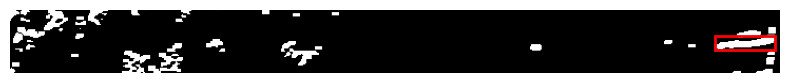

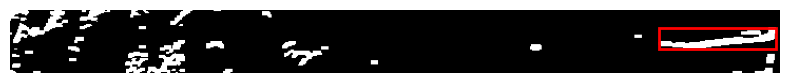

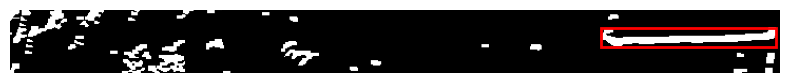

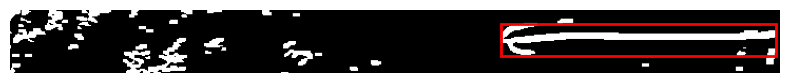

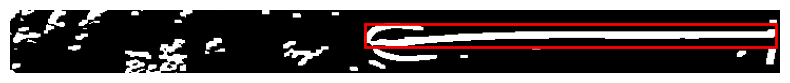

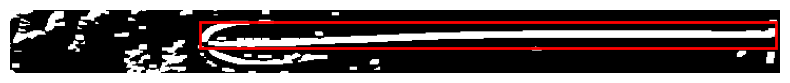

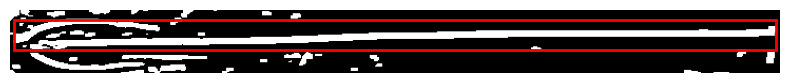

In [15]:
ch = 'Channel 0'


dir_path = ' '

input_folder = 'Streamer ' + str(streamer_nr) + '/binary_255'
folder_path = os.path.join(dir_path, input_folder)

# Path to the output folder to save cropped images
output_folder = 'Streamer ' + str(streamer_nr) + '/' + str(ch)

output_base_folder = os.path.join(dir_path, output_folder)

if not os.path.exists(output_base_folder):
    os.makedirs(output_base_folder)

Tracked = tracked_regions[ch]

for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        image_path = os.path.join(folder_path, filename)

        # Load the image
        image = Image.open(image_path)
        image_array = np.array(image, dtype=np.float64)

        # Create a figure to display plots
        fig, axes = plt.subplots(1, figsize=(8, 4))

        # Perform region labeling and display rectangles
        label_image = label(image_array)
        axes.imshow(image_array, cmap=plt.cm.gray)
        axes.axis('off')

        if filename in Tracked.AllRegions:
          minr, minc, maxr, maxc = Tracked.AllRegions[filename][0], Tracked.AllRegions[filename][1], Tracked.AllRegions[filename][2], Tracked.AllRegions[filename][3],
          
          # Calculate length and height
          length = maxc - minc
          height = maxr - minr

          print(f"{filename}, Length: {length}, Height: {height}")
          
          rect = mpatches.Rectangle((minc, minr),
                                    maxc - minc,
                                    maxr - minr,
                                    fill=False,
                                    edgecolor='red',
                                    linewidth=2)
          # Add the rectangle to the plot
          axes.add_patch(rect)

        plt.tight_layout()

        # Save the annotated image to the output folder
        output_path = os.path.join(output_base_folder, f'{os.path.splitext(filename)[0]}.jpg')
        plt.savefig(output_path)